In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

## Оценка алгоритма задачи (lem-in), авторы - (slynell, vcaterpi)

### Функция для парсинга результатов
1.Запускался скрипт, следующего содержания (**автор - VCATERPI**)

```bash
echo ""
echo "INPUT NUMBER OF TRIALS"
read TRIALS
echo ""

FLAGS[0]="--flow-one"
FLAGS[1]="--flow-ten"
FLAGS[2]="--flow-thousand"
FLAGS[3]="--big"
FLAGS[4]="--big-superposition"

I=3;
OK=0;
COUNT=$TRIALS;
while [ "$COUNT" -gt 0 ]; do
	./gen ${FLAGS[$I]} > graph
	AWAITED_RESULT=$(cat graph | grep -m 1 "Here is the" | awk '{print $8}');
	echo "lem-in"
	TIME=$(time ./lem-in < graph > time_lemin)
	REAL_RESULT=$(cat time_lemin | wc -l | awk '{print $1}');
	echo "${REAL_RESULT};${AWAITED_RESULT}"
	((COUNT--));
done```

2. Итеративно, руками указанный скрипт запускался 5 раз, далее результат работы скрипта (500 прогонов алгоритма для пяти разных карт), записывался в текстовые файлы, формат наименования ('flow-one.txt', ..).
3. Вид полученных результатов:  

| Номер строки | Содержание результата | Описание |
|:-:|:-:|:-:|
| 1 | lem-in | Наименование бинарника |
| 2 |  | \n (Пустая строка) |
| 3 | real 0m0.078s | Реальное или общее или прошедшее (время настенных часов) – это время от начала до конца вызова. |
| 4 | user 0m0.058s | Количество процессорного time, проведенного в пользовательском режиме. |
| 5 | sys  0m0.016s | Количество процессорного time, проведенного в режиме ядра |
| 6 | 31;31 | ```bash ${REAL_RESULT};${AWAITED_RESULT}``` REAL_RESULT - результат нашего алгоритма, AWAITED_RESULT - ожидание |
| ... | ... | ... |

In [182]:
def file_parse(name):
    f = open(name+'.txt', 'r')
    st = f.read()
    lis = st.split('\n')
    f.close()
    res['lemin_speed_' + name] = []
    res['lemin_current_' + name] = []
    i = 0;
    while (i + 6 < len(lis)):
        res['lemin_speed_' + name].append(float(lis[i + 2].split('m')[1].split('s')[0]))
        current = int(lis[i + 5].split(';')[0]) - int(lis[i + 5].split(';')[1])
        if (current < 0): 
            current = 0
        res['lemin_current_' + name].append(current)
        i += 6

### Запуск парсинга файлов для 5 карт, с последующей упаковкой в DataFrame (pandas) 

In [188]:
res = dict()
names_file = ['flow-one', 'flow-ten','flow-thousand', 'big', 'big-superpotion']
for name in names_file:
    file_parse(name)
df = pd.DataFrame(res)

### Вычислили некоторые метрики результатов

In [184]:
pd.DataFrame(res).describe().T

,count,mean,std,min,25%,50%,75%,max
lemin_speed_flow-one,500.0,0.022824,0.012461,0.006,0.01300,0.018,0.02800,0.063
lemin_current_flow-one,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000
lemin_speed_flow-ten,500.0,0.060664,0.030652,0.017,0.03675,0.061,0.07825,0.174
lemin_current_flow-ten,500.0,0.106000,0.308146,0.000,0.00000,0.000,0.00000,1.000
lemin_speed_flow-thousand,500.0,0.057284,0.026460,0.023,0.03600,0.056,0.07125,0.176
lemin_current_flow-thousand,500.0,0.148000,0.355456,0.000,0.00000,0.000,0.00000,1.000
lemin_speed_big,500.0,2.003716,0.813066,0.477,1.39650,1.906,2.49850,5.747
lemin_current_big,500.0,0.028000,0.217510,0.000,0.00000,0.000,0.00000,2.000
lemin_speed_big-superpotion,500.0,4.311872,3.184070,0.298,1.29125,4.021,6.69850,15.913
lemin_current_big-superpotion,500.0,0.104000,0.324646,0.000,0.00000,0.000,0.00000,2.000


### Ну и собственно визуализиция результатов

In [193]:
def plot(name):
    fig = plt.figure(figsize =(15, 7))
    plt.title('В секундах время выполнения / Точность дельта (карта - ' + name + ' )', fontsize=16)
    sns.boxplot(data=df[['lemin_speed_' + name, 'lemin_current_' + name]], linewidth=2.5)


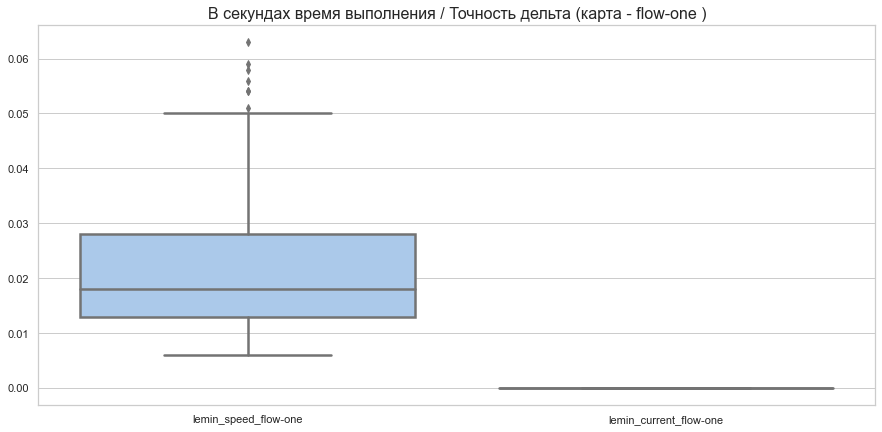

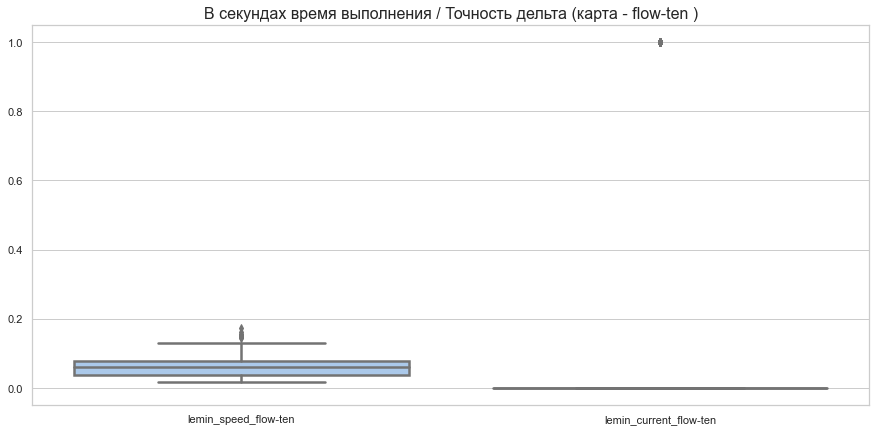

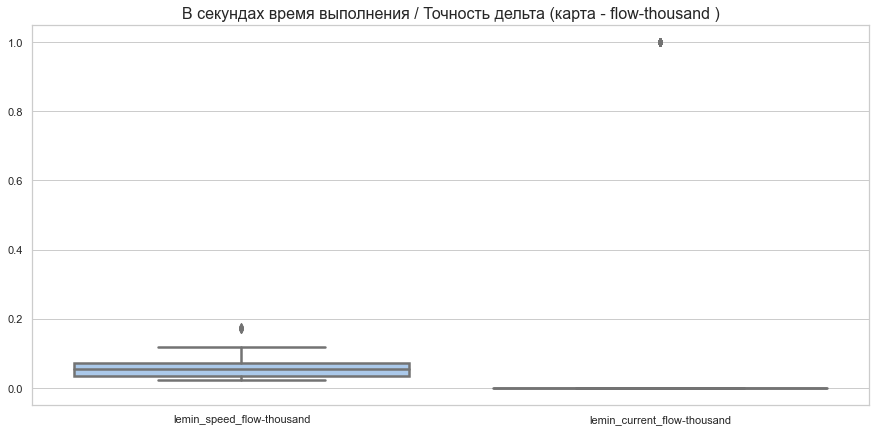

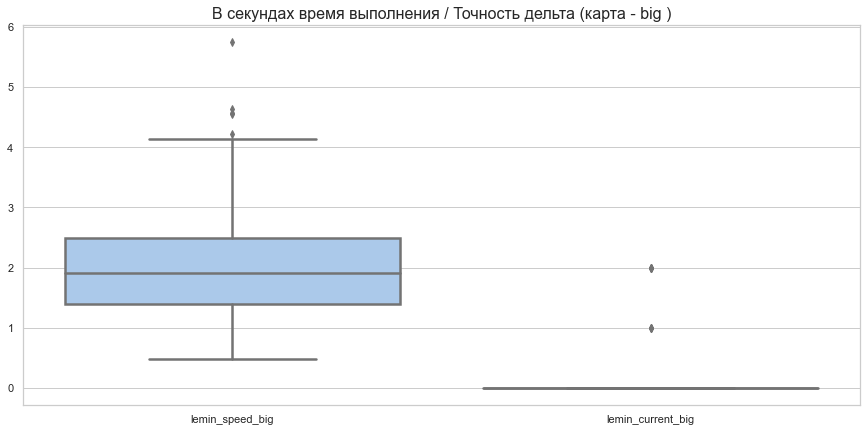

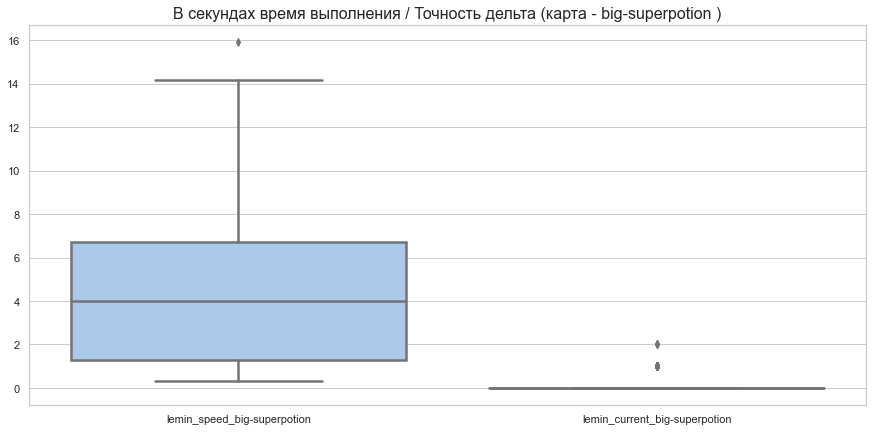

In [194]:
for name in names_file:
    plot(name)